# Redes Neuronales Tradicionales

Antes que nada, el preámbulo

In [1]:
#
# preámbulo
#
!pip install --quiet mglearn
#
# paquetes estandar de Python
#
import os
#
# paquetes estandar para computación científica
#
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rng
import pandas as pd
#
# paquete del libro Muller & Guido
#
import mglearn
#
# configuración por defecto para gráficas
#
mpl.rcParams['figure.dpi']  = 100
mpl.rcParams['figure.figsize']  = [6,4]
mpl.rcParams['savefig.dpi'] = 150

mpl.rcParams['font.size']        = 10
mpl.rcParams['legend.fontsize']  = 'medium'
mpl.rcParams['figure.titlesize'] = 'medium'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 9.6 MB/s eta 0:00:00


## Clasificación

Las redes neuronales (ANN) son, como muchos otros de los modelos que vimos, _aproximadores de funciones_.  

Como tales, pueden ser usadas tanto para clasificación como para regresión.

Y al igual que muchos otros modelos que vimos, tienen parámetros que se pueden ajustar de diversas maneras, imponiendo regularizaciones como Ridge o Lasso.

Lo que hace tan versátiles a las ANN es que son _aproximadores universales_, en el sentido de que, con suficientes neuronas, y suficientes datos, pueden aproximar _cualquier función_.

El primer ejemplo que vemos abajo es tomado del libro de Müller y Guido. No es un ejemplo particularmente interesante, ni muestra el potencial de las ANN. Lo que sí muestra es cómo usarlas en SKlearn sobre un problema conocido, y cómo, al igual que otros métodos que vimos, el _pipeline_ es más o menos el mismo.

En el notebook que sigue a este veremos cómo hacer una red poderosa y realmente interesante.



Text(0, 0.5, 'Característica 2')

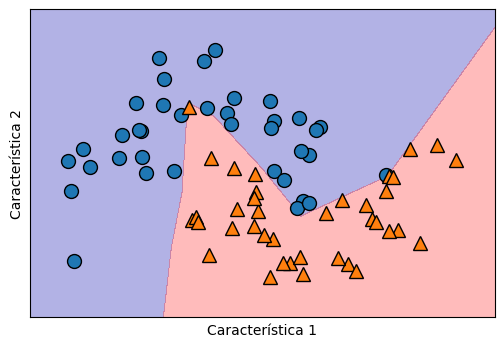

In [3]:
# datos
from sklearn.datasets import make_moons
# división de conjuntos
from sklearn.model_selection import train_test_split
# red neuronal para clasificación. MLP = Multi Layer Perceptron
from sklearn.neural_network import MLPClassifier
#
# dataset sintético de las "dos lunas"
#
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
#
# lo de siempre: dividir en entrenamiento y validación
#
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=42)
#
# creamos una red neuronal con una capa oculta de 20 neuronas
# el resto de los parámetros son más técnicos y no importan en este momento
#
modelo = MLPClassifier(solver='lbfgs', max_iter=1000, random_state=0, hidden_layer_sizes=[20])
#
# ajustamos el modelo a los datos de entrenamiento
#
modelo.fit(X_train, y_train)
#
# veamos la clasificación obtenida usando las utilidades del libro de Müller & Guido
#
mglearn.plots.plot_2d_separator(modelo, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")


## Ajuste de hiperparámetros

Al igual que vimos con otros modelos, las redes neuronales tienen hiperparámetros.
De hecho, el mayor problema al aplicar redes neuronales es la cantidad **enorme** de hiperparámetros, arquitecturas y variantes que uno puede combinar para lograr una red que funcione bien.

En el siguiente ejemplo, nos limitaremos a usar redes de una sola capa oculta, y a ajustar la complejidad del modelo en términos de la cantidad de neuronas en esa capa, y de un parámetro $\alpha$ de regularización.

En realidad, pueden tener la cantidad de capas que uno quiera, y cada capa puede tener a su vez una cantidad arbitraria de neuronas.

El método que veremos abajo simplemente prueba distintas cantidades de neuronas y distintos valoers de $\alpha$ y nos muestra la clasificación resultante. Para hacer correctamente la selección de hiperparámetros, como ya vimos, hay que tener reservado un conjunto de test al final.


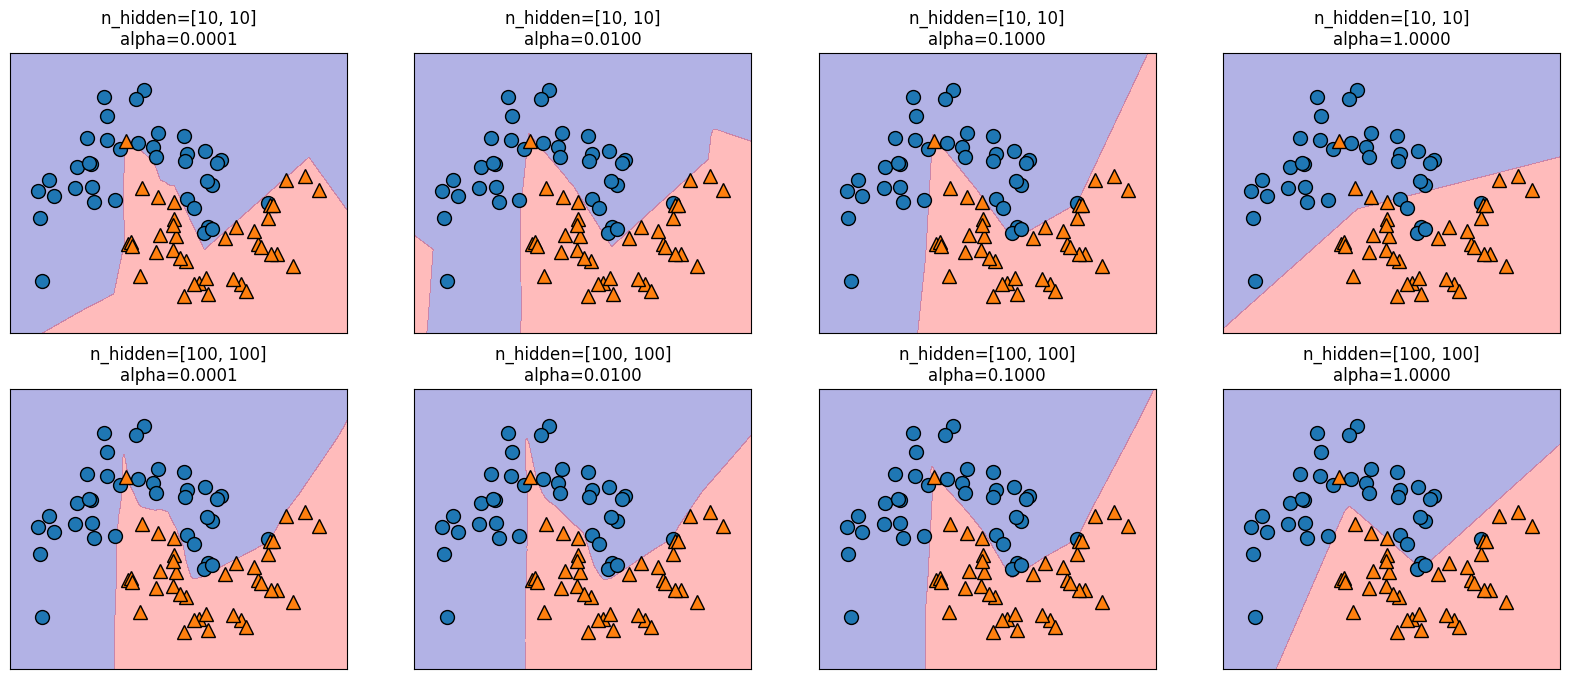

In [4]:
# figura con 2 x 4 subfiguras, 20 pulgadas de ancho y 8 de alto
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
#
# probamos ditintas cantidades de neuronas: 10, 100
#
for axx, n_hidden_nodes in zip(axes, [10, 100]):
  #
  # probamos distintos valores de regularización
  #
  for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
    #
    # para cada combinación:
    #
    # creamos el modelo
    #
    model = MLPClassifier(solver='lbfgs', random_state=0, max_iter=1000, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],alpha=alpha)
    #
    # lo ajustamos
    #
    model.fit(X_train, y_train)
    #
    # y mostramos la clasificación
    #
    mglearn.plots.plot_2d_separator(model, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
    ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

plt.show()